## Problem Statement

### Case Study Approach
* Data Exploration
    - Missing value treatment
* Data Visialization

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

import warnings 
warnings.filterwarnings(action= 'ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm


In [3]:
# Import raw data into pandas dataframe
raw_data = pd.read_csv('Leads.csv')
raw_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# All prospects are unique in the given dataset
sum(raw_data["Prospect ID"].value_counts() > 1)

0

In [5]:
raw_data.shape

(9240, 37)

In [6]:
# Dropping prospect id and lead number since these will not add any useful information 
raw_data.drop(columns = ["Prospect ID","Lead Number"], inplace = True)

In [7]:
# Current conversion rate - 38.54%
num_converted = raw_data.Converted.value_counts()[1]
num_not_converted = raw_data.Converted.value_counts()[0]

num_converted, num_not_converted

(3561, 5679)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [9]:
raw_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Patterns in Numeric Data

* Outliers in TotalVisits, Total Time Spent on Website, and Page Views Per Visit

In [10]:
for col in raw_data.select_dtypes(exclude='number').columns:
    print(col, raw_data[col].unique(), "\n")


Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Do Not Email ['No' 'Yes'] 

Do Not Call ['No' 'Yes'] 

Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam'] 

Country [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Sa

### Missing Value Treatment

In [11]:
# Calculate percentage of missing values for each source
100 * (raw_data.isnull().sum()/len(raw_data))

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#### Missing values treatment
Columns having more than 25% of missing values should be dropped. 
However, asymmetric activity and score columns can provide valuable information about a certain lead because in many cases interested customers will have better profiles and more activity than non interested customers. Let's examine how the missing values are distributed for these columns.

In [12]:
# Percent missing in asymmetric activity score
a = raw_data[raw_data["Converted"] == 1]["Asymmetrique Activity Score"].isnull().sum()/len(raw_data[raw_data["Converted"] == 1])
b = raw_data[raw_data["Converted"] == 0]["Asymmetrique Activity Score"].isnull().sum()/len(raw_data[raw_data["Converted"] == 0])

print("Percent missing activity score for converted:", a*100)
print("Percent missing for activity score non-converted:", b*100)

# Mean of assymetric activity score
c = raw_data[raw_data["Converted"] == 1]["Asymmetrique Activity Score"].mean()
d = raw_data[raw_data["Converted"] == 0]["Asymmetrique Activity Score"].mean()

print("Mean activity score for converted:", c)
print("Mean for activity score non-converted:", d, "\n")

# Percent missing in asymmetric profile score
e = raw_data[raw_data["Converted"] == 1]["Asymmetrique Profile Score"].isnull().sum()/len(raw_data[raw_data["Converted"] == 1])
f = raw_data[raw_data["Converted"] == 0]["Asymmetrique Profile Score"].isnull().sum()/len(raw_data[raw_data["Converted"] == 0])

print("Percent missing profile score for converted:", e*100)
print("Percent missing for profile score non-converted:", f*100)

# Mean of assymetric activity scores
g = raw_data[raw_data["Converted"] == 1]["Asymmetrique Profile Score"].mean()
h = raw_data[raw_data["Converted"] == 0]["Asymmetrique Profile Score"].mean()

print("Mean activity score for converted:", g)
print("Mean for activity score non-converted:", h)

Percent missing activity score for converted: 46.4195450716091
Percent missing for activity score non-converted: 45.16640253565768
Mean activity score for converted: 14.60377358490566
Mean for activity score non-converted: 14.123956326268464 

Percent missing profile score for converted: 46.4195450716091
Percent missing for profile score non-converted: 45.16640253565768
Mean activity score for converted: 16.85062893081761
Mean for activity score non-converted: 16.03500321130379


There is no difference in the number of missing and mean values for these columns they can be dropped. In addition to this, we can also drop the following columns:
- Tags, Lead Profile,

In [13]:
raw_data_1 = raw_data.drop(columns = ["Asymmetrique Profile Score",
                        "Asymmetrique Activity Score",
                        "Asymmetrique Profile Index",
                        "Asymmetrique Activity Index"])

In [14]:
raw_data_1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
# Assessing tags colummn

nan_cols = ["Tags", "Lead Quality", "Lead Profile", 
           "How did you hear about X Education", "What is your current occupation",
           "What matters most to you in choosing a course", "Country", "City", "Specialization"]

for i in nan_cols:
    a = len(raw_data_1[(raw_data_1[i].isnull()) & (raw_data_1["Converted"] == 1)])/num_converted
    print("Percent missing for converted in",i,a)
    
    b = len(raw_data_1[(raw_data_1[i].isnull()) & (raw_data_1["Converted"] == 0)])/num_not_converted
    print("Percent missing for non-converted in",i,b,"\n")

Percent missing for converted in Tags 0.2347655153046897
Percent missing for non-converted in Tags 0.4432118330692023 

Percent missing for converted in Lead Quality 0.2875596742488065
Percent missing for non-converted in Lead Quality 0.6590949110758937 

Percent missing for converted in Lead Profile 0.10390339792193204
Percent missing for non-converted in Lead Profile 0.41186828667018843 

Percent missing for converted in How did you hear about X Education 0.07947205841055884
Percent missing for non-converted in How did you hear about X Education 0.3387920408522627 

Percent missing for converted in What is your current occupation 0.10390339792193204
Percent missing for non-converted in What is your current occupation 0.4085226272231027 

Percent missing for converted in What matters most to you in choosing a course 0.10390339792193204
Percent missing for non-converted in What matters most to you in choosing a course 0.41186828667018843 

Percent missing for converted in Country 0.302

#### Justification for dropping columns and imputation
We can clearly see that there is a distinction between the percentage of NaNs for converted and non-converted leads. Let us impute the missing values in the columns with the value of "No Answer" to preserve the information because when it comes to the converted leads, percentage of missing values is less than 25% except for Tags and Country. We can drop these two columns 

We can also drop lead quality because its value is assigned based on "intuition of the employee" assigned to the lead and may cause bias. Lead quality can also be dropped as based on the levels of this categorical variable the information contained is very similar to lead quality and can be interpreted from other variables.

In [16]:
# Dropping Tags and Country column
raw_data_1.drop(columns=["Tags", "Country", "Lead Quality", "Lead Profile"], inplace = True)

# Replacing the NaNs with No Answer for the rest of the columns
fil_cols = [ "How did you hear about X Education", "What is your current occupation",
           "What matters most to you in choosing a course", "City", "Specialization"]

for i in fil_cols:
    raw_data_1.fillna(value = {i:"Select"}, inplace = True)


raw_data_1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,No,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [17]:
100 * (raw_data_1.isnull().sum()/len(raw_data_1))

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [18]:
raw_data_1.shape

(9240, 27)

In [19]:
raw_data_1.dropna(inplace = True)
raw_data.shape

(9240, 35)

#### Deleting Columns Instead of Imputation


In [20]:
drop_cols = ["Asymmetrique Profile Score",
            "Asymmetrique Activity Score",
            "Asymmetrique Profile Index",
            "Asymmetrique Activity Index",
            "Tags", "Lead Quality", "Lead Profile", 
           "How did you hear about X Education", "What is your current occupation",
           "What matters most to you in choosing a course", "Country", "City", "Specialization"]

raw_data_2 = raw_data.drop(drop_cols, axis =1)
raw_data_2.dropna(inplace = True)

raw_data_2.shape, 100 * (raw_data_2.isnull().sum()/len(raw_data_2))

((9074, 22),
 Lead Origin                                 0.0
 Lead Source                                 0.0
 Do Not Email                                0.0
 Do Not Call                                 0.0
 Converted                                   0.0
 TotalVisits                                 0.0
 Total Time Spent on Website                 0.0
 Page Views Per Visit                        0.0
 Last Activity                               0.0
 Search                                      0.0
 Magazine                                    0.0
 Newspaper Article                           0.0
 X Education Forums                          0.0
 Newspaper                                   0.0
 Digital Advertisement                       0.0
 Through Recommendations                     0.0
 Receive More Updates About Our Courses      0.0
 Update me on Supply Chain Content           0.0
 Get updates on DM Content                   0.0
 I agree to pay the amount through cheque    0.0
 A free

### Data Visialization

#### Univariate Analysis

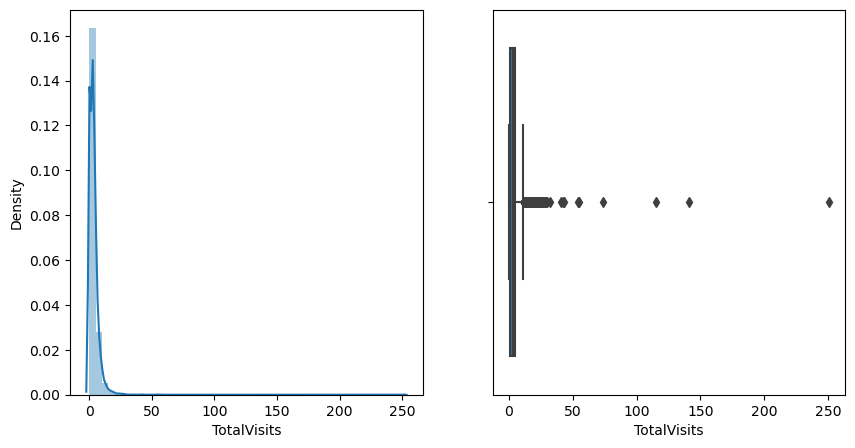

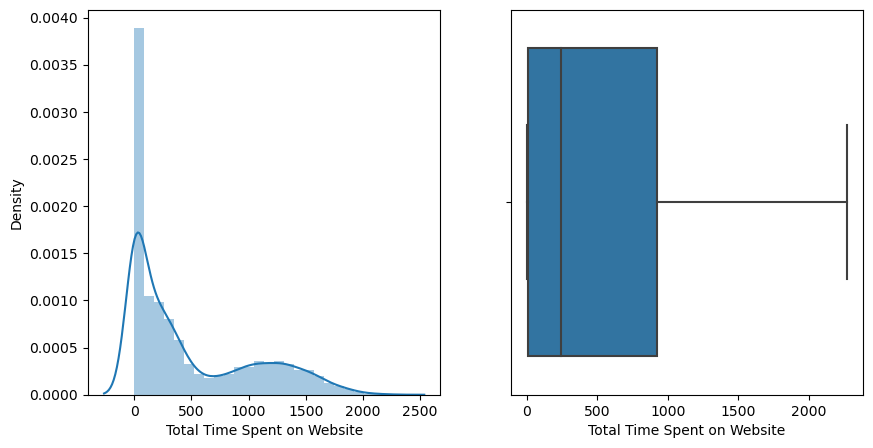

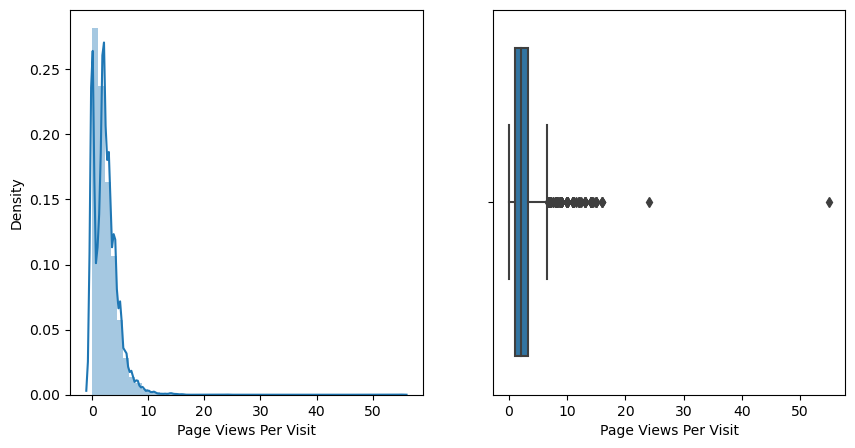

In [21]:
# Numerical Variables
for col in ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]:
    plt.figure(figsize=[10,5])
    
    plt.subplot(121)
    sns.distplot(raw_data_2[col])
    
    plt.subplot(122)
    sns.boxplot(raw_data_2[col], orient = 'v')
    plt.show()


From univariate analysis of numeric variables, we found that outlier treatment will be necessary before we train our model on the data. One apprach for this could be dripping values outside of a certain threshhold which could be obtained from metrics like IQR.

,Lead Origin,Absolute_conversions,Total_Leads
0,Lead Import,9,30
1,Lead Add Form,544,581
2,API,1115,3578
3,Landing Page Submission,1767,4885


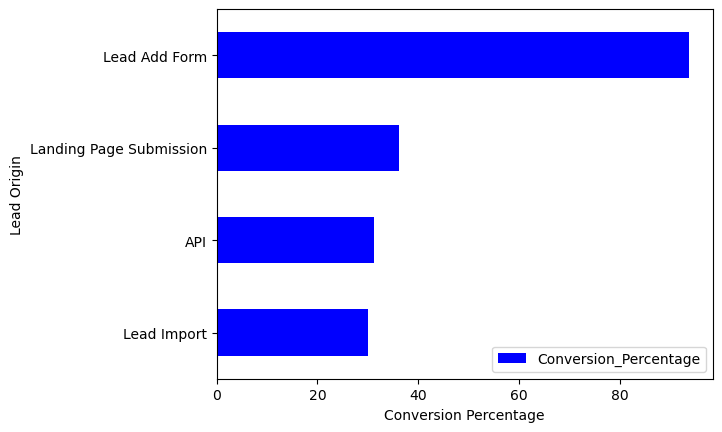

,Lead Source,Absolute_conversions,Total_Leads
0,WeLearn,1,1
1,Social Media,1,2
2,NC_EDM,1,1
3,bing,1,6
4,Live Chat,2,2
5,Click2call,3,4
6,Facebook,9,31
7,Referral Sites,31,125
8,Welingak Website,127,129
9,Reference,410,443


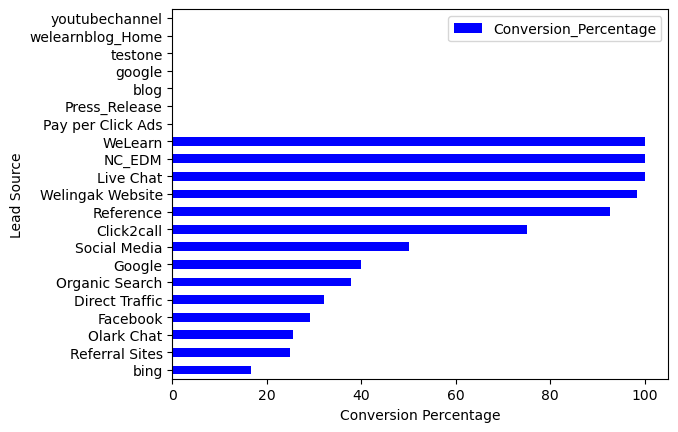

,Do Not Email,Absolute_conversions,Total_Leads
0,Yes,104,716
1,No,3331,8358


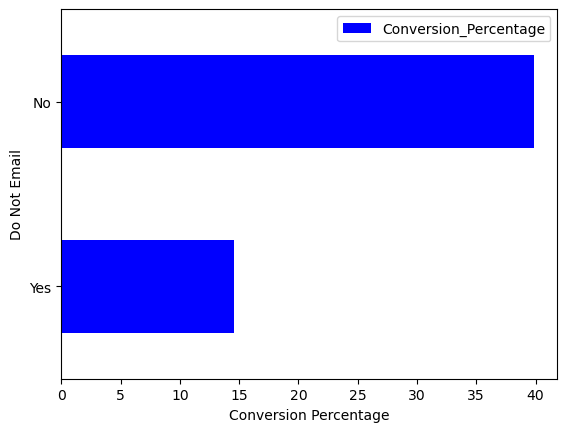

,Do Not Call,Absolute_conversions,Total_Leads
0,Yes,2,2
1,No,3433,9072


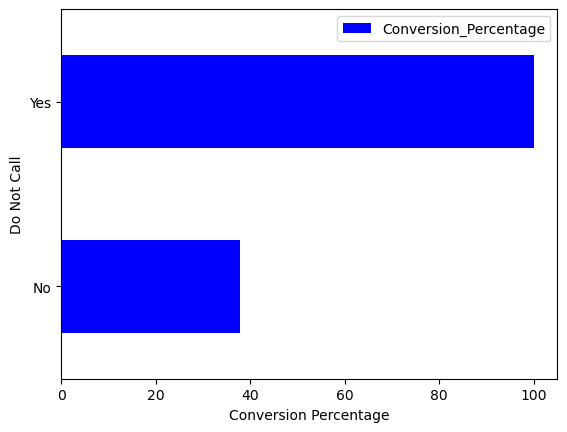

,Last Activity,Absolute_conversions,Total_Leads
0,View in browser link Clicked,1,6
1,Resubscribed to emails,1,1
2,Email Marked Spam,2,2
3,Email Received,2,2
4,Approached upfront,5,5
5,Unsubscribed,14,59
6,Email Bounced,16,312
7,Had a Phone Conversation,20,25
8,Form Submitted on Website,28,116
9,Unreachable,29,90


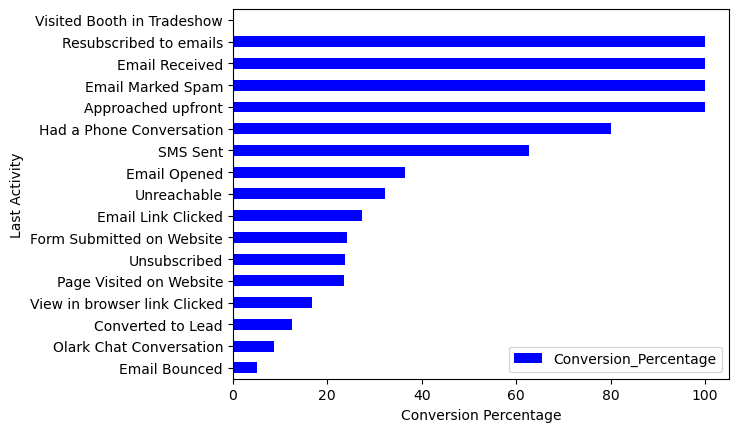

,Search,Absolute_conversions,Total_Leads
0,Yes,5,14
1,No,3430,9060


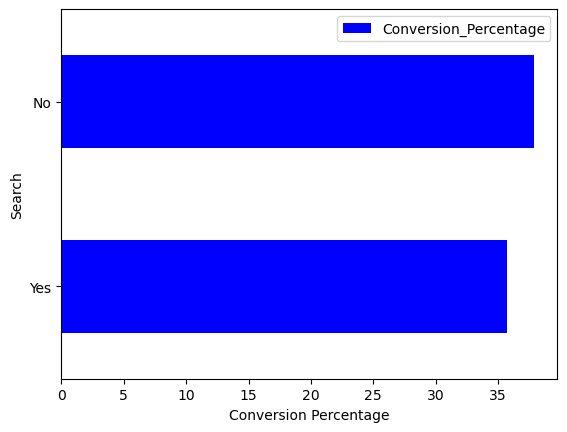

,Magazine,Absolute_conversions,Total_Leads
0,No,3435,9074


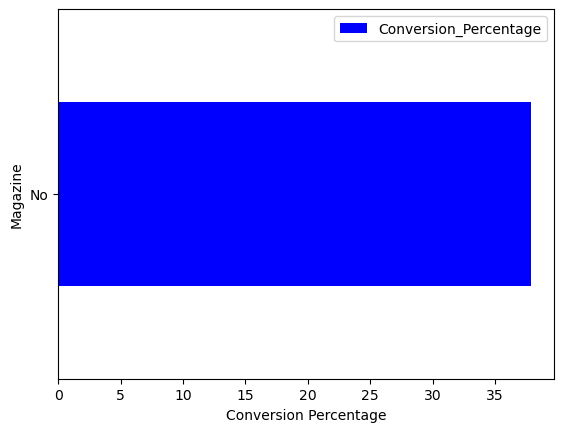

,Newspaper Article,Absolute_conversions,Total_Leads
0,Yes,1,2
1,No,3434,9072


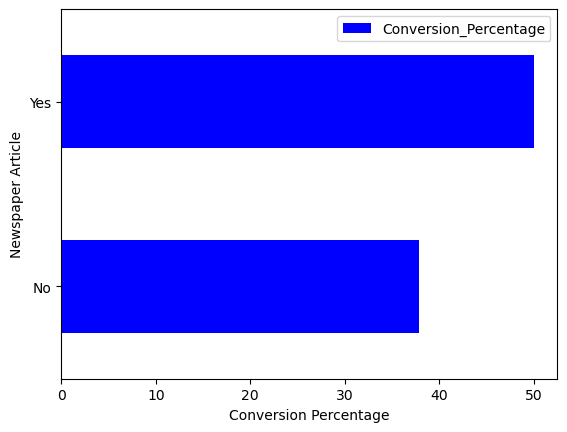

,X Education Forums,Absolute_conversions,Total_Leads
0,No,3435,9073


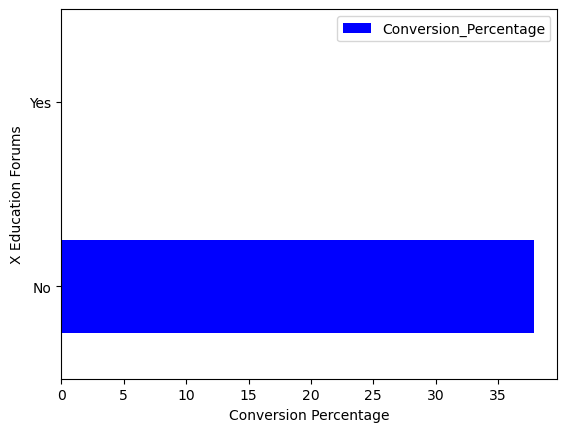

,Newspaper,Absolute_conversions,Total_Leads
0,No,3435,9073


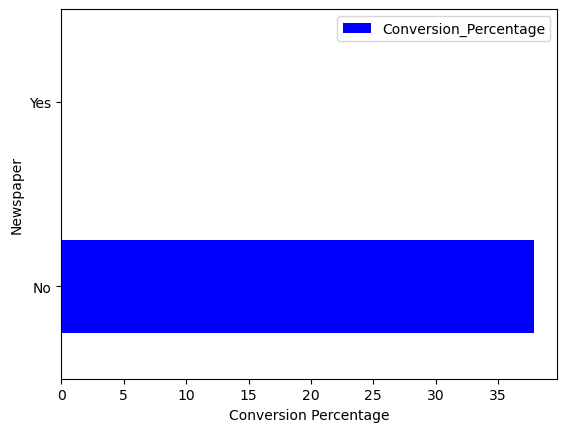

,Digital Advertisement,Absolute_conversions,Total_Leads
0,Yes,1,4
1,No,3434,9070


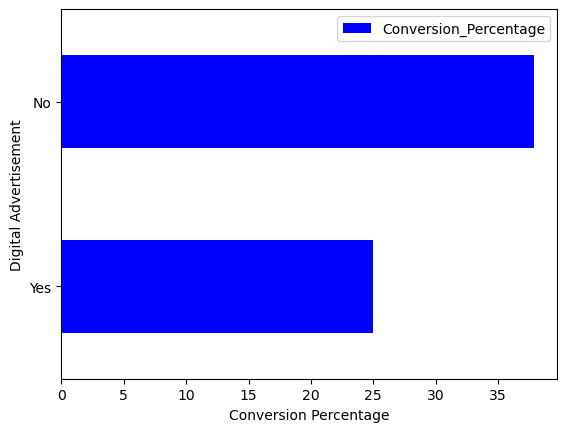

,Through Recommendations,Absolute_conversions,Total_Leads
0,Yes,5,7
1,No,3430,9067


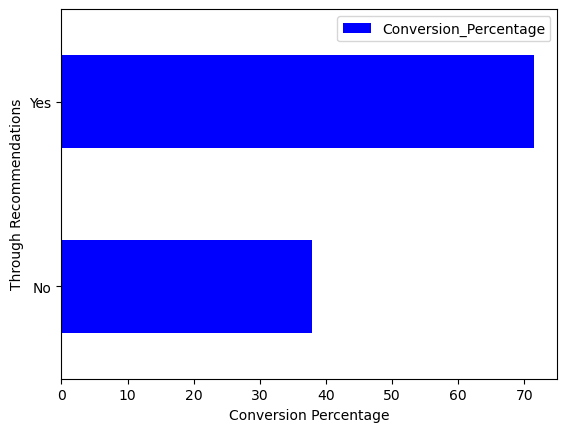

,Receive More Updates About Our Courses,Absolute_conversions,Total_Leads
0,No,3435,9074


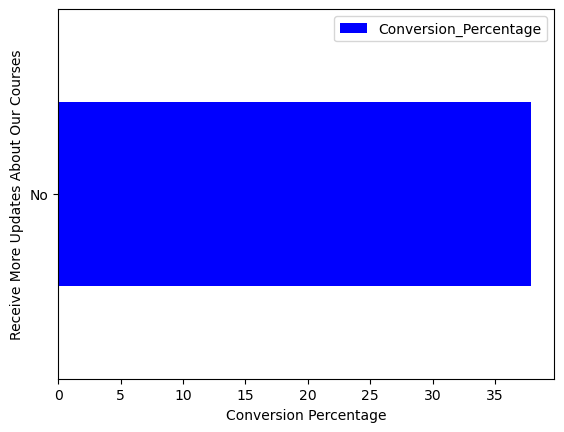

,Update me on Supply Chain Content,Absolute_conversions,Total_Leads
0,No,3435,9074


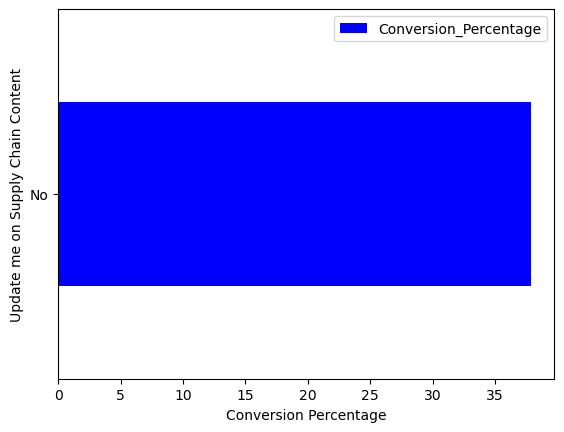

,Get updates on DM Content,Absolute_conversions,Total_Leads
0,No,3435,9074


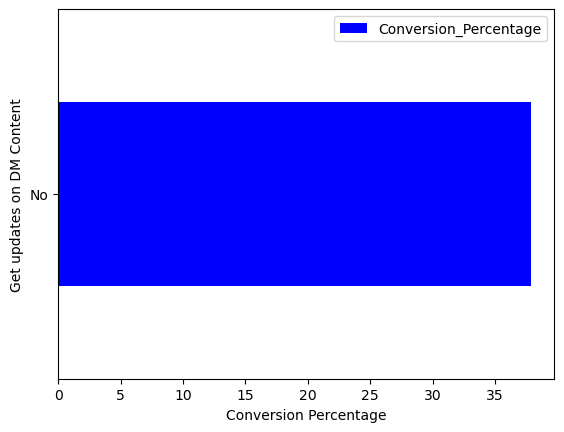

,I agree to pay the amount through cheque,Absolute_conversions,Total_Leads
0,No,3435,9074


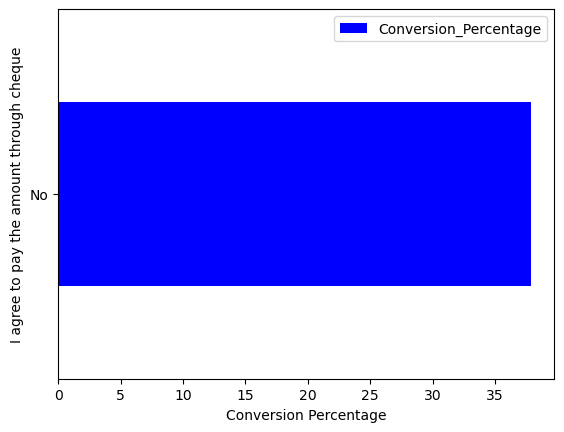

,A free copy of Mastering The Interview,Absolute_conversions,Total_Leads
0,Yes,1030,2888
1,No,2405,6186


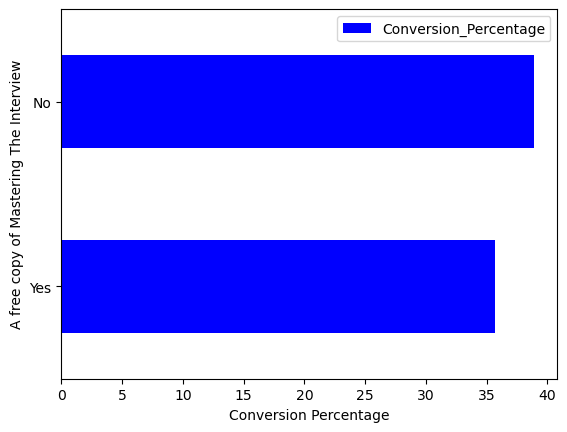

,Last Notable Activity,Absolute_conversions,Total_Leads
0,Approached upfront,1,1
1,Resubscribed to emails,1,1
2,Email Received,1,1
3,Email Marked Spam,2,2
4,Email Bounced,9,60
5,Unsubscribed,12,45
6,Had a Phone Conversation,13,14
7,Unreachable,22,32
8,Olark Chat Conversation,25,183
9,Email Link Clicked,45,173


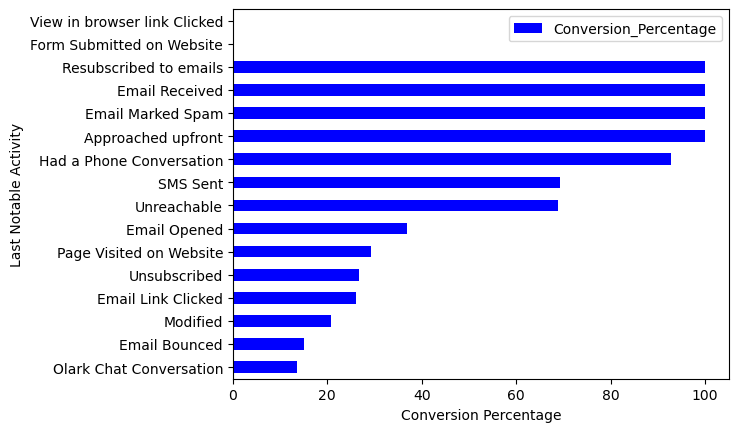

In [22]:
#Categorical variables 
for col in raw_data_2.select_dtypes(exclude = "number"):
    
    df1 = pd.DataFrame(raw_data_2[raw_data_2.Converted == 1][col].value_counts())
    df2 = pd.DataFrame(raw_data_2[col].value_counts())

    df1.sort_values(col,inplace=True)
    df1.reset_index(inplace = True)
    df1.columns = [col,"Absolute_conversions"]
    df1.Absolute_conversions.fillna(0)
    
    df2.sort_values(col,inplace=True)
    df2.reset_index(inplace = True)
    df2.columns = [col,"Total_Leads"]
    df2.Total_Leads.fillna(0)
    
    df3 = df1.merge(df2, how = 'inner', on = col)
    display(df3)
    
    
    # Plotting conversion percentage
    df = pd.DataFrame( (raw_data_2[raw_data_2.Converted == 1][col].value_counts()*100)/
                                      (raw_data_2[col].value_counts()) )

    df.sort_values(col,inplace=True)
    df.reset_index(inplace = True)
    df.columns = [col,"Conversion_Percentage"]
    df.Conversion_Percentage.fillna(0)
    

    name = "Conversion Percentage for Labels in" + col
    df.plot.barh(x = col, y = "Conversion_Percentage", color = "blue")
    plt.xlabel("Conversion Percentage")
    plt.show()

#### Bivariate Analysis


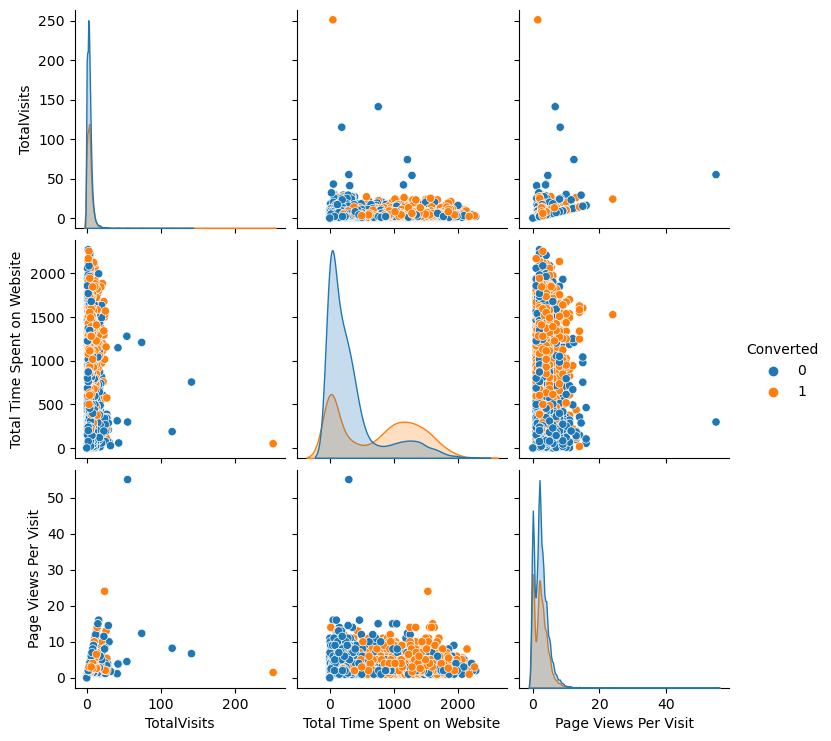

In [23]:
# Bivariate analysis for the numeric columns

sns.pairplot(raw_data_2.select_dtypes(include = "number"),hue='Converted')
plt.show()

- We don't observe a normal distribution of the data here.
- Converted leads tend to visit less often but spend more time per visit (middle left).
- Converted leads tend to visit less often but generally view more pages per visit (bottom).

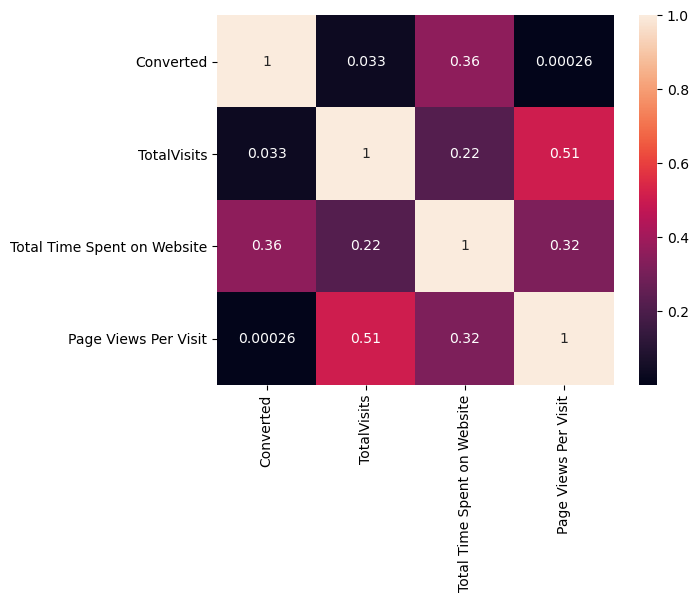

In [24]:
# Multivariate analysis
sns.heatmap(raw_data_2.select_dtypes(include = "number").corr(), annot = True)
plt.show()


- Page views per visit and total visits have a high correlation of 0.51

#### Treating Ourliers

In [25]:
raw_data_2.describe(percentiles=[.05,.25,.75,.90,.95,])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000


In [26]:
# Creating a new dataframe in which outliers have been treated
new_data=raw_data_2.copy()

In [27]:
Q95=new_data['TotalVisits'].quantile(0.95)
new_data['TotalVisits'][new_data['TotalVisits'] >= Q95]  = Q95

In [28]:
Q95=new_data['Page Views Per Visit'].quantile(0.95)
new_data['Page Views Per Visit'][new_data['Page Views Per Visit'] >= Q95]  = Q95

#### Justification for imputing the outliers
Though we have values which seem right but will affect the model with wrong inferences. So to avoid these errors we have handled the outliers in 'TotalVisits' and 'Page Views Per Visit' columns.

#### Binary Category conversion

In [29]:
binary_data=new_data[new_data.select_dtypes(exclude = "number").columns].nunique().sort_values()

binary_data

I agree to pay the amount through cheque     1
Get updates on DM Content                    1
Magazine                                     1
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
X Education Forums                           2
Do Not Email                                 2
Do Not Call                                  2
Search                                       2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Lead Origin                                  4
Last Notable Activity                       16
Last Activity                               17
Lead Source                                 21
dtype: int64

In [30]:
# Dropping categorical columns with single 

In [31]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

bin_cols=['Search','Do Not Email','Do Not Call','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','A free copy of Mastering The Interview']
new_data[bin_cols]=new_data[bin_cols].apply(binary_map)
new_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,...,0,0,0,0,No,No,No,No,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,...,0,0,0,0,No,No,No,No,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,...,0,0,0,0,No,No,No,No,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,...,0,0,0,0,No,No,No,No,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,...,0,0,0,0,No,No,No,No,0,Modified


#### Creating dummy variables for the remaining categorical variables.


In [32]:
cat_cols = new_data.select_dtypes(exclude = "number").columns

dummy=pd.get_dummies(new_data[cat_cols],drop_first=True) 
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
dummy.shape

(9074, 54)

In [34]:
new_data.shape

(9074, 22)

In [35]:
# Adding the dummies to the dataframe
new_data = pd.concat([new_data, dummy], axis=1)
print(new_data.shape)

new_data.drop(cat_cols, axis = 1, inplace = True)
print(new_data.shape)

(9074, 76)
(9074, 67)


In [36]:
new_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


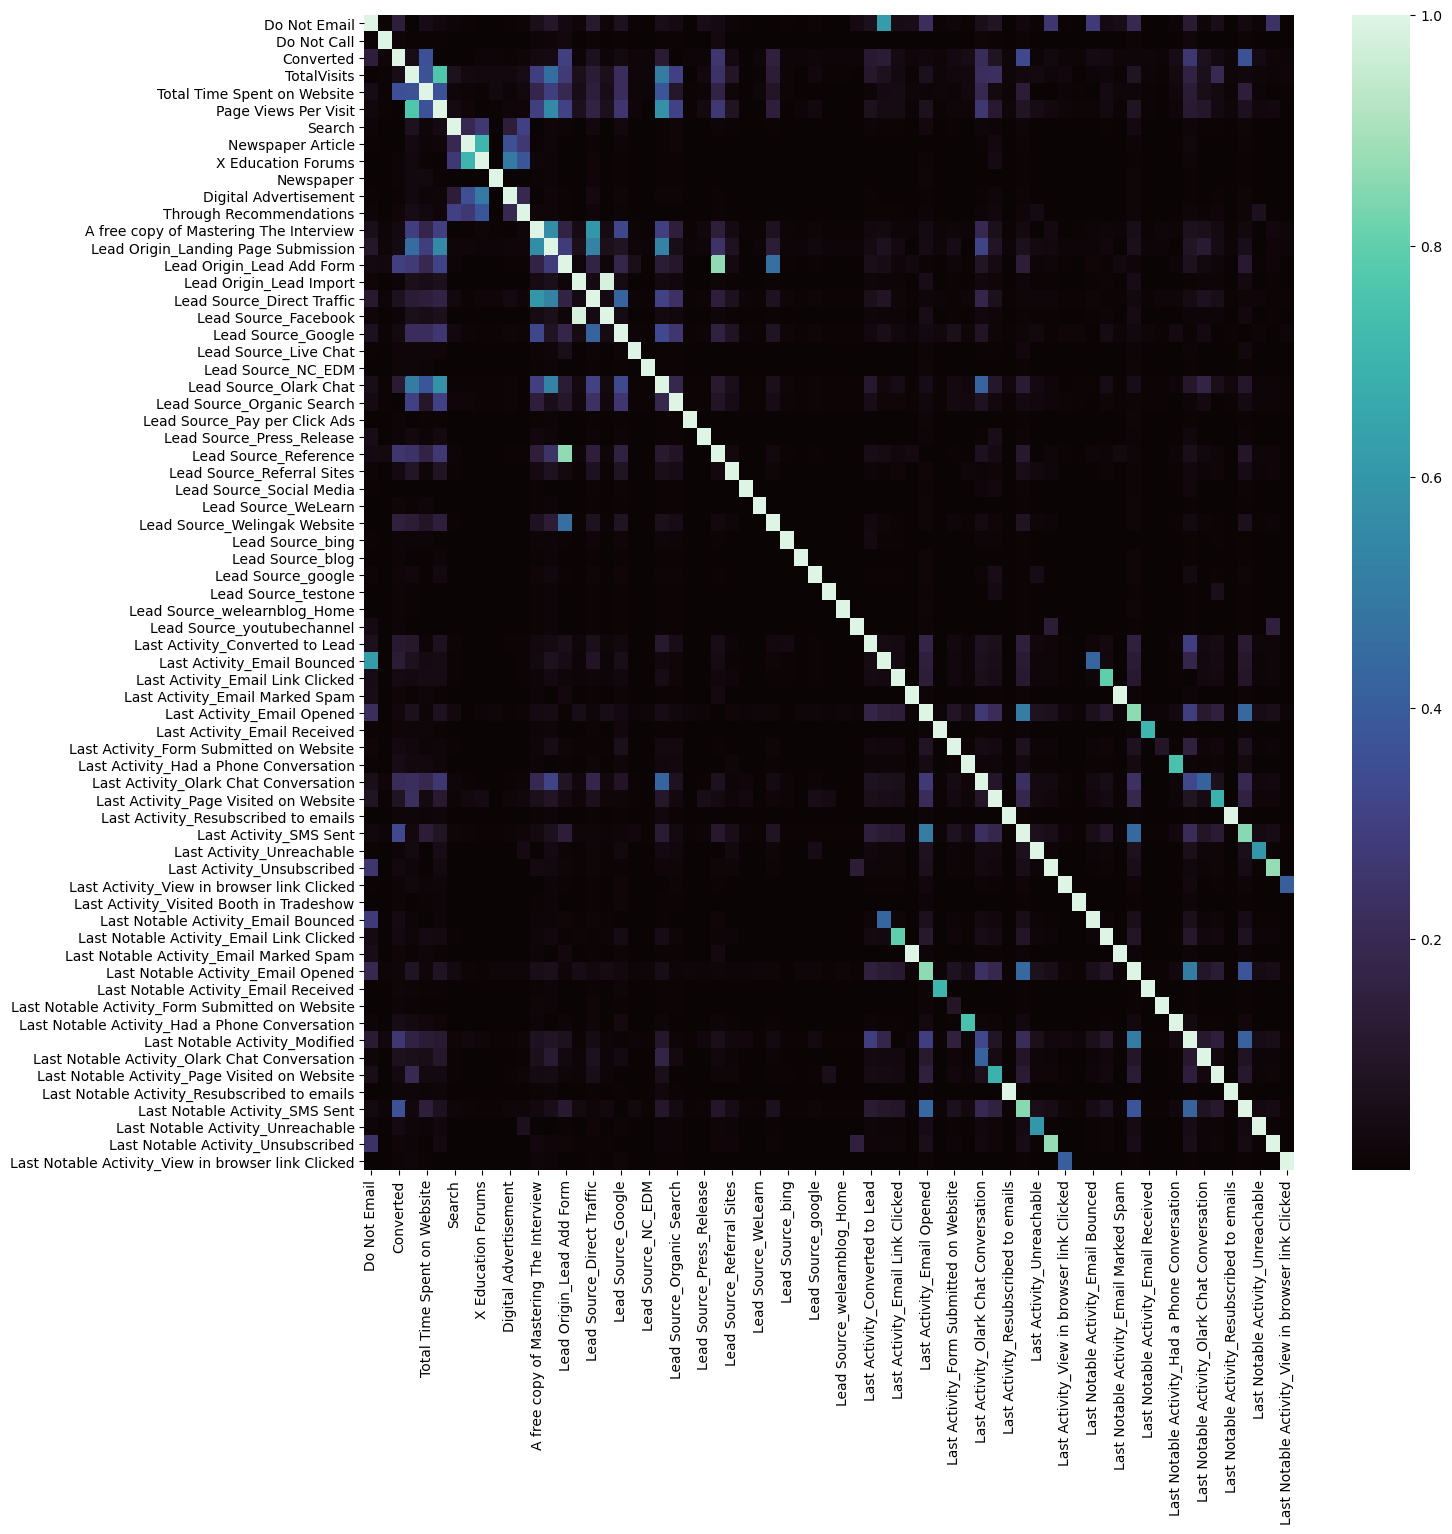

In [37]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(new_data.corr().abs(), cmap="mako")
plt.show()

In [38]:
# Features with high correlation with label to be used as the bases of model selection
corr_df = new_data.corr().abs()
corr_df[corr_df["Converted"] > 0.25].index

Index(['Converted', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model Building

In [39]:
# target variable and data
y= new_data['Converted']
X = new_data.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=333)

In [40]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7635,1,0,1.0,345,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7276,0,0,3.0,641,1.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8724,0,0,3.0,389,3.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8314,0,0,10.0,1002,3.67,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5033,0,0,10.0,302,3.50,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
X_train.shape

(6351, 66)

In [42]:
y_train.head()

7635    0
7276    0
8724    0
8314    1
5033    0
Name: Converted, dtype: int64

In [43]:
y_train.shape

(6351,)

In [44]:
# scaling the numeric variables
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7635,1,0,0.1,0.153129,0.166667,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7276,0,0,0.3,0.284510,0.250000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8724,0,0,0.3,0.172659,0.500000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8314,0,0,1.0,0.444740,0.611667,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5033,0,0,1.0,0.134043,0.583333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
conversion_rate = (sum(y_train)/len(y_train.index))*100
conversion_rate

38.15147220910093

In [46]:
X_train_sm = X_train[['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent']]
X_train_sm = sm.add_constant(X_train_sm)

In [47]:
X_train_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7635,1.0,0.153129,0,0,0,1,0
7276,1.0,0.284510,0,0,0,0,0
8724,1.0,0.172659,0,0,1,0,1
8314,1.0,0.444740,0,0,0,0,0
5033,1.0,0.134043,0,0,1,0,1


In [49]:
# Logistic Regression Model

sm_model = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

sm_results = sm_model.fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2976.3
Date:                Tue, 12 Apr 2022   Deviance:                       5952.5
Time:                        13:05:43   Pearson chi2:                 6.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.7851      0.061    -29.357      0.000      -1.904      -1.666
Total Time Spent on Website        3.9679      0.137     29.041      0.000       3.700       4.236
Lead Origin_Lead Add Form          4.9201      0.593      8.294      0.000       3.757       6.083
Lead Source_Reference             -0.7853      0.633     -1.241      0.215      -2.026       0.455
Last Activity_SMS Sent             1.0120      0.140      7.252      0.000       0.738       1.285
Last Notable Activity_Modified    -0.8649      0.084    -10.249      0.000      -1.030      -0.700
Last Notable Activity_SMS Sent     0.3249      0.161      2.024      0.043       0.010       0.640
==================================================================================================
"""

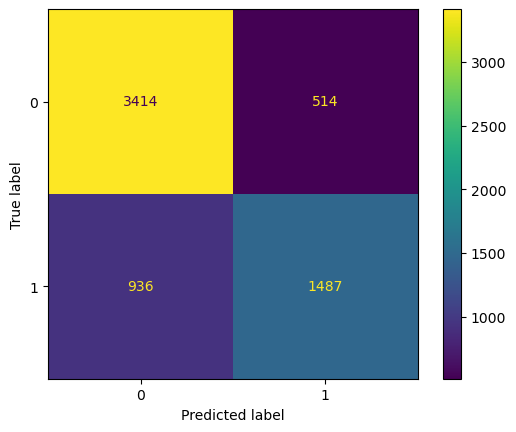

0.771689497716895


In [50]:
# Getting the predicted values on the train set
y_train_pred = sm_results.predict(X_train_sm)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

#Using a threshhold of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
disp = metrics.ConfusionMatrixDisplay(confusion)
disp.plot()

plt.show()

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#### Using SKLearn RFE function to find out the top 15 most significant features

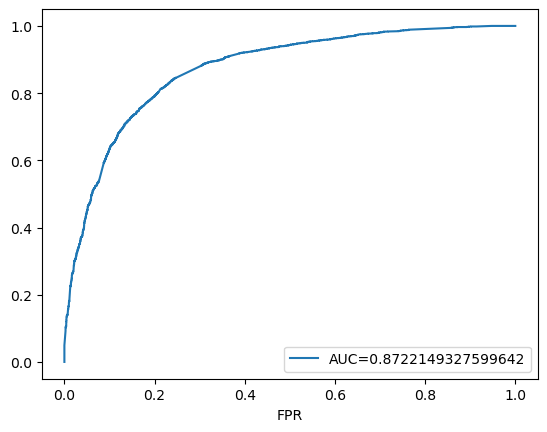

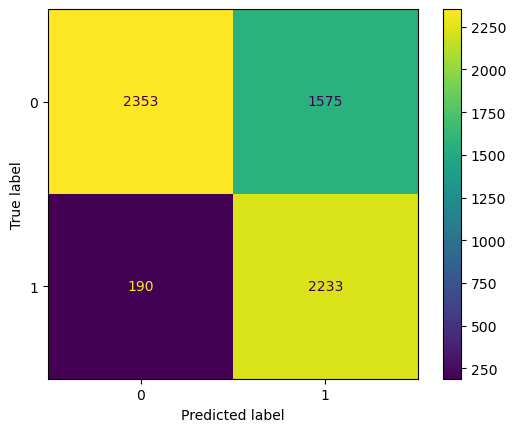

0.7220910092898756


In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

rfe = RFE(logreg, 25)             
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

#Using a threshhold of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.2 else 0)

# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_pred_final.Conversion_Prob)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
auc = metrics.roc_auc_score(y_train, y_train_pred_final.Conversion_Prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.show()

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
disp = metrics.ConfusionMatrixDisplay(confusion)

disp.plot()
plt.show()

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

### Plotting ROC curve for the RFE model with 20 features

In [52]:
# Getting the predicted values on the test set
X_test_sm = sm.add_constant(X_test[col])

scaler = MinMaxScaler()
X_test_sm[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test_sm[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

y_test_pred = res.predict(X_test_sm)

y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})

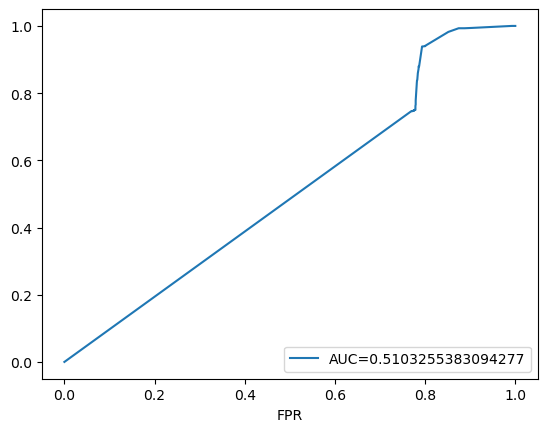

In [466]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred_final.Conversion_Prob)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
auc = metrics.roc_auc_score(y_test, y_test_pred_final.Conversion_Prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("FPR")
plt.show()

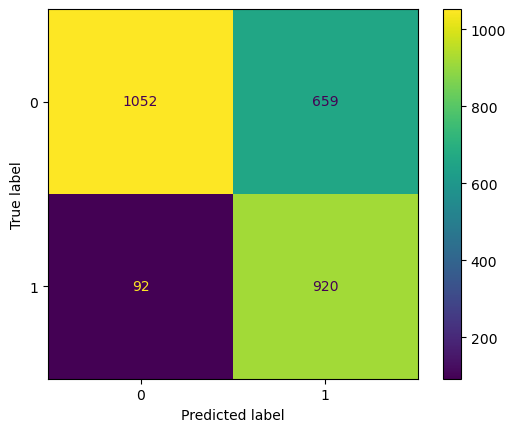

0.7242012486228424


In [55]:
#Using a threshhold of 0.5
y_test_pred_final['predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.2 else 0)

confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
disp = metrics.ConfusionMatrixDisplay(confusion)
disp.plot()

plt.show()

print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))